In [0]:
%matplotlib inline

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical

C:\Users\kamal\Anaconda3\envs\new\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [10]:
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

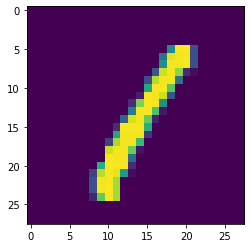

In [11]:
#plot the first image in the dataset
plt.imshow(X_train[3])

In [12]:
#check image shape
X_train[0].shape

(28, 28)

In [13]:
#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [14]:
X_train[0].shape

(28, 28, 1)

In [16]:
y_train[3]

1

In [7]:
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [0]:
#create model
model = Sequential()

#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [0]:
#compile model using accuracy as a measure of model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
#train model
model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=3)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 22s 363us/step - loss: 1.3991 - acc: 0.8830 - val_loss: 0.0882 - val_acc: 0.9738
Epoch 2/3
60000/60000 [==============================] - 20s 334us/step - loss: 0.0712 - acc: 0.9790 - val_loss: 0.0874 - val_acc: 0.9729
Epoch 3/3
60000/60000 [==============================] - 20s 334us/step - loss: 0.0484 - acc: 0.9854 - val_loss: 0.0898 - val_acc: 0.9757


In [11]:
#show predictions for the first 3 images in the test set
model.predict(X_test[:4])

array([[1.6117248e-09, 8.6684462e-16, 6.8095707e-10, 1.5486043e-08,
        6.2878847e-14, 1.2934288e-15, 1.1453808e-16, 9.9999928e-01,
        1.0626109e-08, 6.9729606e-07],
       [1.3555871e-07, 2.6465393e-06, 9.9999511e-01, 2.0351818e-08,
        1.9796262e-11, 1.6996018e-12, 2.1163373e-06, 1.2008194e-17,
        4.8792381e-10, 2.6086671e-13],
       [6.7238901e-08, 9.9785548e-01, 1.9031411e-04, 3.9194603e-08,
        1.2894072e-04, 1.5791730e-06, 1.2754040e-06, 4.1349044e-09,
        1.8221687e-03, 5.5910935e-08],
       [9.9999356e-01, 1.6909821e-12, 8.2496926e-10, 1.7359107e-11,
        1.7359230e-12, 1.8865266e-13, 6.4659162e-06, 2.3738855e-11,
        1.1319052e-08, 2.6948474e-08]], dtype=float32)

In [12]:
#show actual results for the first 3 images in the test set
y_test[:4]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)